# Gradient Tree Boosting

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from src.gradboost import GradBoost
import src.utils as utils

In [26]:
df = pd.read_csv("data/diamonds.csv")
X_train, X_test, y_train, y_test = utils.preprocessing_LOS(df)

In [3]:
param_grid = {
	"learning_rate": [0.01, 0.1, 0.5, 1.0],
	"subsample": [0.5, 0.75, 1.0],
	"criterion": ["friedman_mse", "squared_error"],
}

random_search = RandomizedSearchCV(GradBoost(loss="log_loss"), param_grid, cv=5, scoring="accuracy", 
								 return_train_score=True, verbose=10, n_iter=10, n_jobs=-1)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradBoost(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.01, 0.1, 0.5, 1.0],
                                        'subsample': [0.5, 0.75, 1.0]},
                   return_train_score=True, scoring='accuracy', verbose=10)

In [4]:
sorted(zip(random_search.cv_results_["mean_test_score"], random_search.cv_results_["params"]), reverse=True, key=lambda x: x[0])

[(0.7853498286340155,
  {'subsample': 1.0, 'learning_rate': 0.5, 'criterion': 'squared_error'}),
 (0.7628044408669554,
  {'subsample': 1.0, 'learning_rate': 0.1, 'criterion': 'friedman_mse'}),
 (0.7604934688980696,
  {'subsample': 0.5, 'learning_rate': 0.1, 'criterion': 'friedman_mse'}),
 (0.7599559934188356,
  {'subsample': 0.5, 'learning_rate': 0.1, 'criterion': 'squared_error'}),
 (0.7442895198167003,
  {'subsample': 1.0, 'learning_rate': 1.0, 'criterion': 'friedman_mse'}),
 (0.7381361376109963,
  {'subsample': 0.75, 'learning_rate': 1.0, 'criterion': 'friedman_mse'}),
 (0.7345892096244275,
  {'subsample': 0.5, 'learning_rate': 0.01, 'criterion': 'squared_error'}),
 (0.7341861716184452,
  {'subsample': 0.75, 'learning_rate': 0.01, 'criterion': 'squared_error'}),
 (0.7341593007330495,
  {'subsample': 0.75, 'learning_rate': 0.01, 'criterion': 'friedman_mse'}),
 (0.7339174699859035,
  {'subsample': 1.0, 'learning_rate': 0.01, 'criterion': 'friedman_mse'})]

The best accuracy is given by a `learning_rate` of 0.5, but 0.1 also yield good results with a `subsample` lower than 1, so we believe that the accuracy that a `learning_rate` of 0.1 can achieve with the full training set (`subsample` = 1.0) is higher than of 0.5. To make sure, we will to a randomized search for the `max_depth` trying both 0.5 and 0.1 `learning_rate`s.

In [5]:
param_grid = {
	"max_depth": list(range(3, 14)),
}

random_search = RandomizedSearchCV(GradBoost(learning_rate=0.5, criterion="squared_error"), param_grid, cv=5, scoring="accuracy", 
								   return_train_score=True, verbose=10, n_iter=5, n_jobs=-1)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=GradBoost(criterion='squared_error',
                                       learning_rate=0.5),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13]},
                   return_train_score=True, scoring='accuracy', verbose=10)

In [6]:
sorted(zip(random_search.cv_results_["mean_test_score"], random_search.cv_results_["params"]), reverse=True, key=lambda x: x[0])

[(0.7914761955260229, {'max_depth': 12}),
 (0.7867468547036488, {'max_depth': 4}),
 (0.7838986311193955, {'max_depth': 9}),
 (0.7690653391106098, {'max_depth': 7}),
 (0.7597414235134979, {'max_depth': 8})]

In [7]:
model = GradBoost(learning_rate=0.5,
				  n_estimators=100,
				  subsample=1.0,
				  criterion="squared_error",
				  max_depth=12)
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model.fit(X_train2, y_train2)
model.compute_metrics(X_val, y_val)

{'accuracy': 0.787316942093242,
 'precision': 0.7631578947368421,
 'recall': 0.7160493827160493,
 'f1': 0.7388535031847134}

In [8]:
param_grid = {
	"max_depth": list(range(3, 14)),
}

random_search = RandomizedSearchCV(GradBoost(learning_rate=0.1, criterion="squared_error"), param_grid, cv=5, scoring="accuracy", 
								   return_train_score=True, verbose=10, n_iter=10, n_jobs=-1)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradBoost(criterion='squared_error'),
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13]},
                   return_train_score=True, scoring='accuracy', verbose=10)

In [9]:
sorted(zip(random_search.cv_results_["mean_test_score"], random_search.cv_results_["params"]), reverse=True, key=lambda x: x[0])

[(0.795802584999395, {'max_depth': 7}),
 (0.7955607723057866, {'max_depth': 9}),
 (0.7949426913917808, {'max_depth': 10}),
 (0.7934647493665283, {'max_depth': 11}),
 (0.7930080526360277, {'max_depth': 13}),
 (0.7923362118976929, {'max_depth': 6}),
 (0.7923093012945144, {'max_depth': 12}),
 (0.7871231229240462, {'max_depth': 5}),
 (0.7780405650713947, {'max_depth': 4}),
 (0.7628044408669554, {'max_depth': 3})]

This time the best max_depth is around 8. We will take 7, which its accuracy is very similar and it's less computationally expensive.

In [10]:
model = GradBoost(learning_rate=0.1,
				  n_estimators=100,
				  subsample=1.0,
				  criterion="squared_error",
				  max_depth=7)
model.fit(X_train2, y_train2)
model.compute_metrics(X_val, y_val)

{'accuracy': 0.793900309015182,
 'precision': 0.793036750483559,
 'recall': 0.7231040564373897,
 'f1': 0.7564575645756457}

In [19]:
model.cross_validation(X_train, y_train, n_splits=5, val_size=0.2)

Performing cross validation


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.1min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.1min remaining:   42.9s


Cross validation (accuracy) scores:
	mean: 0.7927986027139594 std: 0.0029878684667833375


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


We confirm that `learning_rate` of 0.1 not only achieved a slightly higher accuracy than 0.5, but the `max_depth` is also lower, which means the model is simpler and more efficient.

We also observe that recall is lower than the other metrics, this is probably because the model has a trend higher than it should be to predict the classes with more frequency. Below we show this.

In [11]:
result_df = pd.DataFrame({"y_val": y_val, "y_pred": model.predict(X_val)})
result_counts = result_df.apply(pd.Series.value_counts)
result_counts

,y_val,y_pred
4,3231,3547
3,1837,1875
2,1765,1461
1,567,517
0,43,43


Now we will check if incerasing `n_estimators` increases the metrics.

In [12]:
model0 = GradBoost(learning_rate=0.1,
				  n_estimators=200,
				  subsample=1.0,
				  criterion="squared_error",
				  max_depth=7)
model0.fit(X_train2, y_train2)
model0.compute_metrics(X_val, y_val)

{'accuracy': 0.7967217519817278,
 'precision': 0.7726432532347505,
 'recall': 0.7372134038800705,
 'f1': 0.7545126353790614}

In [18]:
model0.cross_validation(X_train, y_train, n_splits=5, val_size=0.2)

Performing cross validation


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.1min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  2.1min remaining:  1.4min


Cross validation (accuracy) scores:
	mean: 0.7965336557839581 std: 0.004603948067913986


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.1min finished


They were vaguely decreased, but they were not increased, which means that making the model more complex doesn't improve it.

This is the best we could achieve tunning the model's parameters, so now we will test it.

In [27]:
model1 = GradBoost(learning_rate=0.1,
				  n_estimators=100,
				  subsample=1.0,
				  criterion="squared_error",
				  max_depth=7)
model1.fit(X_train, y_train)
model1.compute_metrics(X_test, y_test)

{'accuracy': 0.7698839208942391,
 'precision': 0.5796045785639958,
 'recall': 0.7661623108665749,
 'f1': 0.6599526066350712}

Interestingly, the metrics have decreased significantly (except recall) when training on `X_train` and testing on `X_test`. Let's try what happens if we split the training fom the test set differently, and evaluate exactly the same model again.

In [25]:
X_train3, X_test3, y_train3, y_test3 = utils.preprocessing_LOS(df, test_size=0.2, random_state=0)
model3 = GradBoost(learning_rate=0.1,
				  n_estimators=100,
				  subsample=1.0,
				  criterion="squared_error",
				  max_depth=7)
model3.fit(X_train3, y_train3)
model3.compute_metrics(X_test3, y_test3)

{'accuracy': 0.7912725709372312,
 'precision': 0.7787610619469026,
 'recall': 0.6892950391644909,
 'f1': 0.7313019390581718}

Now we have similar metrics as with the validation set. We believe this could have happened because, with the previous specific random state, the dataset was divided in such a way that the distribution in the training set was very different from the one in the test set. Changing the random state to any number (0 in the above example) prooved this.

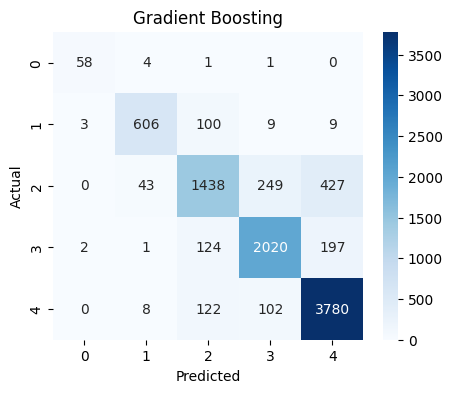

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat = model3.conf_matrix(X_test, y_test)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

So now we will compare this last Gradient Boosting `model3` to a Random Forest trained on the same dataset `X_train3` and `y_train3`.

In [35]:
from src.randomforest import RandomForest
model2 = RandomForest(n_estimators=100, max_depth=16, bootstrap=True, class_weight="balanced")
model2.fit(X_train3, y_train3)
diff = model3.compare(model2, X_test3, y_test3)

accuracy 0.011500429922613908
precision 0.013469454550032123
recall -0.01305483028720622
f1 -0.001169129696082849
confusion matrix [[   1   -2    3   -2    0]
 [   0  -10   31  -22    1]
 [   1  -13  170 -163    5]
 [   2  -10   40  -20  -12]
 [   0   10   38  -14  -34]]


What is gained in precision by Gradient Boosting, is lost in recall, compared to Random Forest.

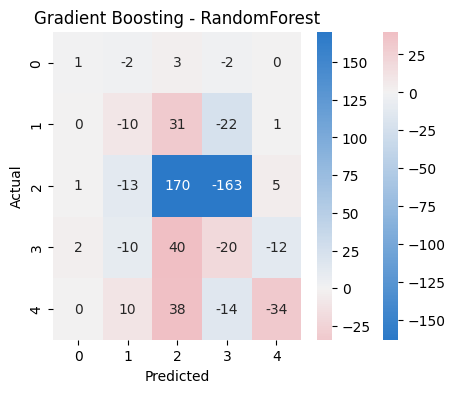

In [36]:
import numpy as np

conf_mat_diff = diff["confusion matrix"]

mask = np.eye(conf_mat_diff.shape[0], dtype=bool)
cmap_diag = sns.diverging_palette(250, 10, s=90, l=50, as_cmap=True)
cmap_offdiag = sns.diverging_palette(10, 250, s=90, l=50, as_cmap=True)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat_diff, mask=mask, annot=True, fmt="d", cmap=cmap_diag, center=0)
sns.heatmap(conf_mat_diff, mask=~mask, annot=True, fmt="d", cmap=cmap_offdiag, center=0)
plt.title("Gradient Boosting - RandomForest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Comparing the Gradient Boosting model with the Random Forest, we observe that, similar to AdaBoost, Gradient Boosting predicts class 2 more often that it should, gaining precision on it but loosing it with other classes. However, this model is less complex in terms of `max_depth` (7 vs 16), but still, Random Forest seems to generalize better to the overall distribution of classes.